In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
pipy
 uninstall tensorflow absl-py astunparse flatbuffers gast google-pasta grpcio h5py keras keras-preprocessing libclang numpy opt-einsum protobuf setuptools six tensorboard tensorflow-io-gcs-filesystem termcolor tf-estimator-nightly typing-extensions wrapt 

Found existing installation: tensorflow 2.10.0
Uninstalling tensorflow-2.10.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.10.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.10.0
Found existing installation: absl-py 1.4.0
Uninstalling absl-py-1.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/absl/*
    /usr/local/lib/python3.10/dist-packages/absl_py-1.4.0.dist-info/*
Proceed (Y/n)? y
  Successfully uninstalled absl-py-1.4.0
Found existing installation: astunparse 1.6.3
Uninstalling astunparse-1.6.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/astunparse-1.6.3.dist-info/*

In [98]:
pip install --no-cache-dir tensorflow

y
y
y
y
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 296.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 344.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 187.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 251.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 236.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 256.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 209.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 287.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 286.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 373.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 380.4 MB/s eta 0:00:00
     ━

In [99]:
#basics
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

#text_processing
from num2words import num2words
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from nltk.stem import SnowballStemmer

#data preperation
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Neural Network
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Embedding, LSTM, Dropout, concatenate, Input, Dense
from tensorflow.keras.layers import Bidirectional, Attention, Reshape, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#other
from tqdm import tqdm
import gc

#warnings
import warnings
warnings.filterwarnings("ignore")

In [53]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Reading the train data

In [54]:
train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Quora/train.csv')
train_data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [55]:
train_data.shape

(404290, 6)

In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [57]:
train_data.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [58]:
train_data.dropna(inplace=True)

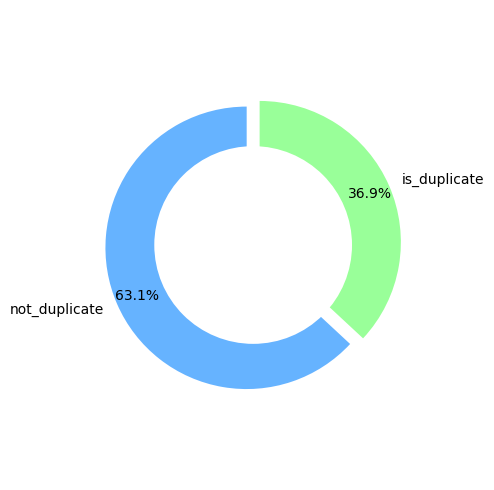

In [59]:
target = train_data['is_duplicate'].value_counts()

## Pie chart for the distribution of the customer churn

labels = ['not_duplicate','is_duplicate']
sizes = target.values.tolist()

#color
colors = ['#66b3ff', '#99ff99']

fig1,ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes,colors = colors,labels = labels,autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = (0.05,0.05))
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

In [60]:
## The number of question is not duplicated is close to the number of question is duplicate

# Preprocessing the data

In [61]:
## lower casing

def lower_casing(text):

  text = text.lower()

  return text

In [62]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [63]:
train_data['new_ques1'] = train_data['question1'].apply(lower_casing)
train_data['new_ques2'] = train_data['question2'].apply(lower_casing)

In [64]:
train_data.head(5)

,id,qid1,qid2,question1,question2,is_duplicate,new_ques1,new_ques2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?


In [65]:
## Replacing the symbols and short forms

In [66]:
def replacements(text):

  text = text.replace('=','is equal to')
  text=text.replace('%', ' percent ')
  text = text.replace('$', ' dollar ')
  text = text.replace('₹', ' rupee ')
  text = text.replace('€', ' euro ')
  text = text.replace('@', ' at ')
  text = text.replace('+', ' plus ')
  text = text.replace('/', ' or ')
  text = text.replace('-', ' ')
  text = text.replace('[math]', '')

  #replacement dict
  replacements_dict = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "can not",
        "can't've": "can not have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "couldn't've": "could not have",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hadn't've": "had not have",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'd've": "he would have",
        "he'll": "he will",
        "he'll've": "he will have",
        "he's": "he is",
        "how'd": "how did",
        "how'd'y": "how do you",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'd've": "I would have",
        "I'll": "I will",
        "I'll've": "I will have",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'd've": "it would have",
        "it'll": "it will",
        "it'll've": "it will have",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "mightn't've": "might not have",
        "must've": "must have",
        "mustn't": "must not",
        "mustn't've": "must not have",
        "needn't": "need not",
        "needn't've": "need not have",
        "o'clock": "of the clock",
        "oughtn't": "ought not",
        "oughtn't've": "ought not have",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "shan't've": "shall not have",
        "she'd": "she would",
        "she'd've": "she would have",
        "she'll": "she will",
        "she'll've": "she will have",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "shouldn't've": "should not have",
        "so've": "so have",
        "so's": "so is",
        "that'd": "that would",
        "that'd've": "that would have",
        "that's": "that is",
        "there'd": "there would",
        "there'd've": "there would have",
        "there's": "there is",
        "they'd": "they would",
        "they'd've": "they would have",
        "they'll": "they will",
        "they'll've": "they will have",
        "they're": "they are",
        "they've": "they have",
        "to've": "to have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'd've": "we would have",
        "we'll": "we will",
        "we'll've": "we will have",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what'll've": "what will have",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "when's": "when is",
        "when've": "when have",
        "where'd": "where did",
        "where's": "where is",
        "where've": "where have",
        "who'll": "who will",
        "who'll've": "who will have",
        "who's": "who is",
        "who've": "who have",
        "why's": "why is",
        "why've": "why have",
        "will've": "will have",
        "won't": "will not",
        "won't've": "will not have",
        "would've": "would have",
        "wouldn't": "would not",
        "wouldn't've": "would not have",
        "y'all": "you all",
        "y'all'd": "you all would",
        "y'all'd've": "you all would have",
        "y'all're": "you all are",
        "y'all've": "you all have",
        "you'd": "you would",
        "you'd've": "you would have",
        "you'll": "you will",
        "you'll've": "you will have",
        "you're": "you are",
        "you've": "you have",
  }
  # Apply replacements
  pattern = re.compile(r'\b(' + '|'.join(replacements_dict.keys()) + r')\b')
  text = pattern.sub(lambda x: replacements_dict[x.group()], text)

  # Remove punctuation
  text = text.translate(str.maketrans("", "", string.punctuation))
    
  return text

In [67]:
train_data['new_ques1']=train_data['new_ques1'].apply(replacements)
train_data['new_ques2']=train_data['new_ques2'].apply(replacements)

In [68]:
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate,new_ques1,new_ques2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,what is the story of kohinoor koh i noor diamond,what would happen if the indian government sto...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,why am i mentally very lonely how can i solve it,find the remainder when 2324 or math is divide...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,which one dissolve in water quikly sugar salt ...,which fish would survive in salt water


In [69]:
## Converting number to words

In [70]:
def num_to_words(text):

  words = text.split()
  converted_text = []

  for word in words:
    if re.match(r'^-?\d\.?\d*$',word):
      try:
        converted_word = num2words(float(word))
        converted_text.append(converted_word)
      except ValueError:
        converted_text.append(word)
    else:
      converted_text.append(word)
  
  text = ' '.join(converted_text)

  return text

In [71]:
train_data['new_ques1']=train_data['new_ques1'].apply(num_to_words)
train_data['new_ques2']=train_data['new_ques2'].apply(num_to_words)

# Stemming

Snowball Stemming , preferred over Porter Stemmer and other stemming algorithm, offers several advantages. Firstly , it supports a wide range of language , making it suitable for multingual datasets. Secondaly , it generates more accurate stems, addressing the limitations of PorteeStemmer and providing better results for word forms and variations.Additionally , snowball stemming allows for fine-grained control over stemming rules, making it customizable and adaptable to specific requirenment.

In [72]:
stemmer = SnowballStemmer('english')

def stem_words(text):
    return ' '.join([(stemmer.stem(word.strip())).strip() for word in text.split()])

In [73]:
pbar = tqdm(total=len(train_data), desc='Stemming question1')
train_data['new_ques1'] = train_data['new_ques1'].apply(lambda x: (pbar.update(1), stem_words(x))[1])
pbar.close()

Stemming question1: 100%|██████████| 404287/404287 [00:48<00:00, 8407.96it/s] 


In [74]:
pbar = tqdm(total=len(train_data), desc='Stemming question2')
train_data['new_ques2'] = train_data['new_ques2'].apply(lambda x: (pbar.update(1), stem_words(x))[1])
pbar.close()

Stemming question2: 100%|██████████| 404287/404287 [00:47<00:00, 8450.02it/s] 


In [75]:
stop_words=stopwords.words('english')

def remove_stopwords(text):

    new_text=[]

    for word in text.split():

        if word in stop_words:
            new_text.append('')

        else:
            new_text.append(word.strip())

    x=new_text[:]
    new_text.clear()
    return ' '.join(x)

In [76]:
pbar = tqdm(total=len(train_data), desc='Removing Stopwords:')
train_data['new_ques1'] = train_data['new_ques1'].apply(lambda x: (pbar.update(1), remove_stopwords(x))[1])
train_data['new_ques2'] = train_data['new_ques2'].apply(lambda x: (pbar.update(1), remove_stopwords(x))[1])
pbar.close()

Removing Stopwords:: 808574it [00:15, 53439.41it/s]


# Vector Representation

In [77]:
operation_df = train_data[['new_ques1', 'new_ques2' , 'is_duplicate']]


In [78]:
# traing and testing dataset
train_df , test_df = train_test_split(operation_df,test_size=0.2,random_state=42)

In [79]:
# Tokenizing the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['new_ques1'].values + train_df['new_ques2'].values)
vocab=tokenizer.word_index

In [80]:
#preparing sequenced data
train_sequences_1 = tokenizer.texts_to_sequences(train_df['new_ques1'].values)
train_sequences_2 = tokenizer.texts_to_sequences(train_df['new_ques2'].values)
test_sequences_1 = tokenizer.texts_to_sequences(test_df['new_ques1'].values)
test_sequences_2 = tokenizer.texts_to_sequences(test_df['new_ques2'].values)

In [81]:
def get_maxlen(data):
    maxlen = 0
    for sent in data:
        maxlen = max(maxlen, len(sent))
    return maxlen

sequences=[train_sequences_1, train_sequences_2, test_sequences_1, test_sequences_2]

max_lengths=[]

for sequence in sequences:
    maxlen = get_maxlen(sequence)
    max_lengths.append(maxlen)

print('Maximum lenght of sentence is:', maxlen)

Maximum lenght of sentence is: 106


In [82]:
maxlen= 30
# Pad sequences to a fixed length
train_data_1 = pad_sequences(train_sequences_1, maxlen=maxlen,  padding='post')
train_data_2 = pad_sequences(train_sequences_2, maxlen=maxlen,  padding='post')
test_data_1 = pad_sequences(test_sequences_1, maxlen=maxlen,  padding='post')
test_data_2 = pad_sequences(test_sequences_2, maxlen=maxlen,  padding='post')

In [83]:
# Prepare the target labels
train_labels = train_df['is_duplicate'].values
test_labels = test_df['is_duplicate'].values

In [84]:
# Reshape the labels to match the model's output shape
train_labels_reshaped = np.expand_dims(train_labels, axis=-1)
test_labels_reshaped = np.expand_dims(test_labels, axis=-1)

In [85]:
#class weights
total_samples = len(train_labels)
class_0_count = np.sum(train_labels == 0)
class_1_count = np.sum(train_labels == 1)

weight_0 = total_samples / (2 * class_0_count)
weight_1 = total_samples / (2 * class_1_count)

class_weight = {0: weight_0, 1: weight_1}
class_weight

{0: 0.7927259090775399, 1: 1.3540412455727575}

In [86]:
#variables
vocab_size = len(tokenizer.word_index) + 1
input_shape = (maxlen,)

In [87]:
# Defining the shared embedding layer
embedding_layer = Embedding(input_dim=vocab_size, output_dim=200, input_length=maxlen,
                            trainable=True)  # Fine-tune embeddings

# Defining the input layers for question 1 and question 2
question1_input = Input(shape=input_shape, name='question1_input')
question2_input = Input(shape=input_shape, name='question2_input')

# Applying the embedding layer to both inputs
embedded_question1 = embedding_layer(question1_input)
embedded_question2 = embedding_layer(question2_input)

# Define the Bidirectional LSTM layers
lstm_layer1 = Bidirectional(LSTM(units=32, return_sequences=True))
lstm_layer2 = Bidirectional(LSTM(units=16, return_sequences=True))

# Apply the LSTM layers to both embedded questions
lstm_question1 = lstm_layer1(embedded_question1)
lstm_question2 = lstm_layer1(embedded_question2)

# Apply dropout after the first LSTM layer
dropout1 = Dropout(0.2)(lstm_question1)
dropout2 = Dropout(0.2)(lstm_question2)

# Apply batch normalization after each LSTM layer
bn1 = BatchNormalization()(dropout1)
bn2 = BatchNormalization()(dropout2)

# Apply the second LSTM layer
lstm_question1 = lstm_layer2(bn1)
lstm_question2 = lstm_layer2(bn2)

# Apply attention mechanism
attention1 = Attention()([lstm_question1, lstm_question2])
attention2 = Attention()([lstm_question2, lstm_question1])

# Concatenate the outputs of the attention layers
merged_output = concatenate([attention1, attention2])

# Flatten the merged output
flatten_output = Flatten()(merged_output)

# Add the output layer
output = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))(flatten_output)

# Creating the Siamese model
model = Model(inputs=[question1_input, question2_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [88]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 question1_input (InputLayer)   [(None, 30)]         0           []                               
                                                                                                  
 question2_input (InputLayer)   [(None, 30)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 30, 200)      15858400    ['question1_input[0][0]',        
                                                                  'question2_input[0][0]']        
                                                                                                  
 bidirectional (Bidirectional)  (None, 30, 64)       59648       ['embedding[0][0]',          

In [100]:
#model1
batch_size=2048
epochs=30
stopper= EarlyStopping(patience=3, monitor='val_loss')
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=3, save_best_only=True)

history=model.fit(
        [train_data_1, train_data_2], train_labels_reshaped, 
         batch_size=batch_size, 
         epochs=epochs, 
         validation_data=([test_data_1, test_data_2], test_labels_reshaped), 
         callbacks=[stopper, checkpointer],
         class_weight=class_weight, 
         shuffle=True
         )

Epoch 1/30
158/158 [==============================] - ETA: 0s - loss: 0.5368 - accuracy: 0.7289
Epoch 1: val_loss improved from inf to 0.67556, saving model to model.weights.best.hdf5
158/158 [==============================] - 75s 318ms/step - loss: 0.5368 - accuracy: 0.7289 - val_loss: 0.6756 - val_accuracy: 0.6311
Epoch 2/30
158/158 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8114
Epoch 2: val_loss did not improve from 0.67556
158/158 [==============================] - 27s 169ms/step - loss: 0.4052 - accuracy: 0.8114 - val_loss: 0.7527 - val_accuracy: 0.6358
Epoch 3/30
158/158 [==============================] - ETA: 0s - loss: 0.3209 - accuracy: 0.8564
Epoch 3: val_loss did not improve from 0.67556
158/158 [==============================] - 22s 140ms/step - loss: 0.3209 - accuracy: 0.8564 - val_loss: 0.8631 - val_accuracy: 0.6935
Epoch 4/30
158/158 [==============================] - ETA: 0s - loss: 0.2716 - accuracy: 0.8817
Epoch 4: val_loss improved from 

In [101]:
chunk_size=50000
threshold=0.5

In [104]:
test_data = '/content/drive/MyDrive/Machine Learning/Quora/test.csv'

In [105]:
test_chunks=pd.read_csv(test_data, chunksize=chunk_size)

In [106]:
test = pd.DataFrame()

for chunk in tqdm(test_chunks,total=47, desc='Processing chunks:'):
    
    if len(chunk) > 0:
        # Operation 1: Filling missing values
        chunk.fillna('NA', inplace=True)

        # Operation 2: Convert to lowercase
        chunk['new_ques1'] = chunk['question1'].apply(lower_casing)
        chunk['new_ques2'] = chunk['question2'].apply(lower_casing)

        chunk=chunk.drop(columns=['question1', 'question2'])

        # Operation 3: Replace punctuation and short forms
        chunk['new_ques1'] = chunk['new_ques1'].apply(replacements)
        chunk['new_ques2'] = chunk['new_ques2'].apply(replacements)

         # Operation 4: converting numbers to text
        chunk['new_ques1'] = chunk['new_ques1'].apply(num_to_words)
        chunk['new_ques2'] = chunk['new_ques2'].apply(num_to_words)

        # Operation 5: Snowball Stemming
        chunk['new_ques1'] = chunk['new_ques1'].apply(stem_words)
        chunk['new_ques2'] = chunk['new_ques2'].apply(stem_words)

        # Operation 6: Removing Stopwords
        chunk['new_ques1'] = chunk['new_ques1'].apply(remove_stopwords)
        chunk['new_ques2'] = chunk['new_ques2'].apply(remove_stopwords)

        # Appending the processed chunk to the list
        test=pd.concat([test, chunk], ignore_index=True)
        
display(test)

Processing chunks:: 100%|██████████| 47/47 [15:41<00:00, 20.04s/it]


,test_id,new_ques1,new_ques2
0,0,doe surfac pro four compar ipad pro,whi microsoft choos core m3 core i3 home su...
1,1,hair transplant age twenty-four much wou...,much cost doe hair transplant requir
2,2,best way send money china us,send money china
3,3,food emulsifi,food fibr
4,4,aberystwyth start read,start read
...,...,...,...
2345791,2345791,peak tv seri whi leland kill laura palmer,studi scene twin peak
2345792,2345792,doe transit mean fedex track,question fedex packag deliv
2345793,2345793,famous romanian drink alcohol non alcohol,non alcohol restaur huge success
2345794,2345794,best worst thing public transit proddatu...,best worst thing examin public transit vi...


In [107]:
test_seq_que_1 = tokenizer.texts_to_sequences(test['new_ques1'].values)
test_seq_que_2 = tokenizer.texts_to_sequences(test['new_ques2'].values)

# Pad sequences to a fixed length
test_seq_que_1 = pad_sequences(test_seq_que_1, maxlen=maxlen,  padding='post')
test_seq_que_2 = pad_sequences(test_seq_que_2, maxlen=maxlen,  padding='post')

In [108]:
submission = pd.read_csv('/content/drive/MyDrive/Machine Learning/Quora/sample_submission.csv')

In [109]:
pred=model.predict([test_seq_que_1, test_seq_que_2])

73307/73307 [==============================] - 651s 9ms/step


In [110]:
threshold = 0.5
pred_binary=(pred > threshold).astype(int)
pred_binary[:10]

array([[0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [111]:
submission['test_id']=test['test_id']
submission['is_duplicate']=pred_binary

In [112]:
submission.head()

,test_id,is_duplicate
0,0,0
1,1,0
2,2,0
3,3,1
4,4,1


In [113]:
submission.to_csv('submission.csv')